### TUMOR DETECTION USING CNN - MODEL BUILDING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

In [2]:
image_dir = r'D:\STUDY\Sem3\deeplearning\Multitasking_app\tumordata'
no_tumor_images = os.listdir(image_dir + '/no')
yes_tumor_images = os.listdir(image_dir + '/yes')


In [3]:
print('The length of NO Tumor images is',len(no_tumor_images))
print('The length of Tumor images is',len(yes_tumor_images))

The length of NO Tumor images is 1500
The length of Tumor images is 1500


In [4]:
dataset=[]
label=[]
img_siz=(128,128)


for i , image_name in tqdm(enumerate(no_tumor_images),desc="No Tumor"):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_dir+'/no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(0)
        
        
for i ,image_name in tqdm(enumerate(yes_tumor_images),desc="Tumor"):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_dir+'/yes/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize(img_siz)
        dataset.append(np.array(image))
        label.append(1)
        
        
dataset=np.array(dataset)
label = np.array(label)

No Tumor: 1500it [00:21, 68.61it/s]
Tumor: 1500it [00:22, 67.90it/s]


In [5]:
print('Dataset Length: ',len(dataset))
print('Label Length: ',len(label))

Dataset Length:  3000
Label Length:  3000


In [6]:
# Training the model
print("Train-Test Split")
x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=42)

# Normalizing the dataset
print("Normalising the Dataset.\n")
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

Train-Test Split
Normalising the Dataset.



In [7]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 256)               32514304  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                        

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
print("Training Started.\n")
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
print("Training Finished.\n")

# Save the trained model
model.save('cnn_tumor_model.h5')
print("Model Saved.\n")

Training Started.

Epoch 1/5
17/17 [==============================] - 19s 1s/step - loss: 0.7715 - accuracy: 0.6310 - val_loss: 0.5245 - val_accuracy: 0.7458
Epoch 2/5
17/17 [==============================] - 17s 999ms/step - loss: 0.4956 - accuracy: 0.7745 - val_loss: 0.4522 - val_accuracy: 0.7750
Epoch 3/5
17/17 [==============================] - 16s 964ms/step - loss: 0.3770 - accuracy: 0.8394 - val_loss: 0.3363 - val_accuracy: 0.8625
Epoch 4/5
17/17 [==============================] - 17s 988ms/step - loss: 0.2672 - accuracy: 0.8894 - val_loss: 0.3017 - val_accuracy: 0.8750
Epoch 5/5
17/17 [==============================] - 16s 960ms/step - loss: 0.1681 - accuracy: 0.9398 - val_loss: 0.1631 - val_accuracy: 0.9417
Training Finished.



d:\STUDY\Sem3\deeplearning\DLENV\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Saved.



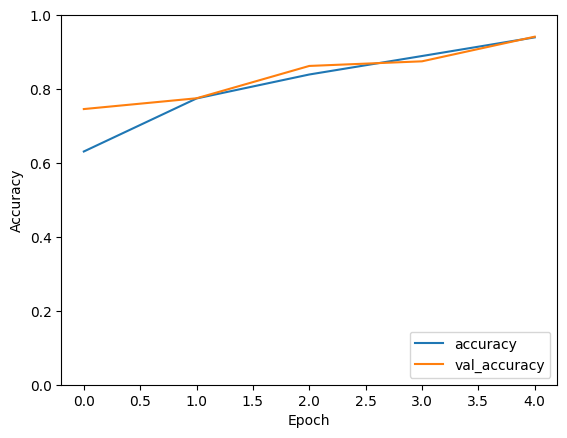

In [9]:
# Plot and save accuracy
plt.plot(history.epoch,history.history['accuracy'], label='accuracy')
plt.plot(history.epoch,history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

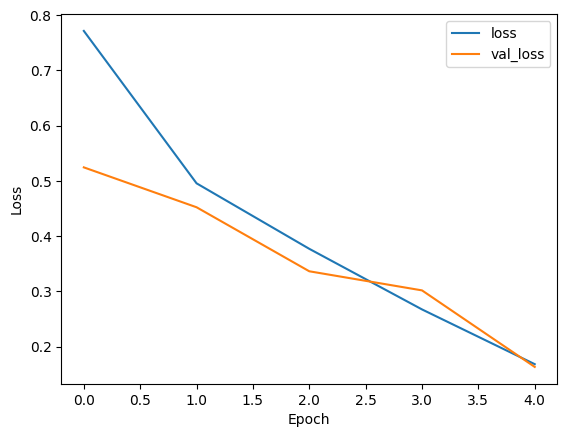

In [10]:
# Plot and save loss
plt.plot(history.epoch,history.history['loss'], label='loss')
plt.plot(history.epoch,history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [11]:
# Model evaluation
print("Model Evalutaion Phase.\n")
loss,accuracy=model.evaluate(x_test,y_test)
print(f'Accuracy: {round(accuracy*100,2)}')
y_pred=model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
print('classification Report\n',classification_report(y_test,y_pred))

Model Evalutaion Phase.

19/19 [==============================] - 1s 54ms/step - loss: 0.1471 - accuracy: 0.9483
Accuracy: 94.83
19/19 [==============================] - 1s 50ms/step
classification Report
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       313
           1       0.94      0.96      0.95       287

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600



In [12]:
# Model prediction function
print("Model Prediction.\n")

def make_prediction(img,model):
    img=cv2.imread(img)
    img=Image.fromarray(img)
    img=img.resize((128,128))
    img=np.array(img)
    input_img = np.expand_dims(img, axis=0)
    res = model.predict(input_img)
    if res:
        print("Tumor Detected")
    else:
        print("No Tumor")
    

Model Prediction.



In [13]:


make_prediction(r'D:\STUDY\Sem3\deeplearning\Multitasking_app\tumordata\yes\y6.jpg',model)
print("--------------------------------------\n")
make_prediction(r'D:\STUDY\Sem3\deeplearning\Multitasking_app\tumordata\no\no1.jpg',model)
print("--------------------------------------\n")

1/1 [==============================] - 0s 65ms/step
Tumor Detected
--------------------------------------

1/1 [==============================] - 0s 33ms/step
No Tumor
--------------------------------------



In [14]:
# Load the saved model in your Streamlit app using this code
from tensorflow.keras.models import load_model

loaded_model = load_model('cnn_tumor_model.h5')
